In [35]:
# Import the modules
import numpy as np
import pandas as pd
from pathlib import Path
from sklearn import metrics
from sklearn.metrics import confusion_matrix, classification_report

---

## Split the Data into Training and Testing Sets

### Step 1: Read the `lending_data.csv` data from the `Resources` folder into a Pandas DataFrame.

In [36]:
pwd

'/Users/afolabimuraina/Downloads/Module 20 HM'

In [37]:
# Read the CSV file from the Resources folder into a Pandas DataFrame
# YOUR CODE HERE!
lending_df = pd.read_csv(Path('Resources/lending_data.csv'))

# Review the DataFrame
# YOUR CODE HERE!
lending_df.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt,loan_status
0,10700.0,7.672,52800,0.431818,5,1,22800,0
1,8400.0,6.692,43600,0.311927,3,0,13600,0
2,9000.0,6.963,46100,0.349241,3,0,16100,0
3,10700.0,7.664,52700,0.430740,5,1,22700,0
4,10800.0,7.698,53000,0.433962,5,1,23000,0


### Step 2: Create the labels set (`y`)  from the “loan_status” column, and then create the features (`X`) DataFrame from the remaining columns.

In [38]:
# Separate the data into labels and features

# Separate the y variable, the labels
# YOUR CODE HERE!]
y = lending_df['loan_status']
# Separate the X variable, the features
# YOUR CODE HERE!
X = lending_df.drop(columns='loan_status')

In [39]:
# Review the y variable Series
# YOUR CODE HERE!
y[:5]

0    0
1    0
2    0
3    0
4    0
Name: loan_status, dtype: int64

In [40]:
# Review the X variable DataFrame
# YOUR CODE HERE!
X.head()

,loan_size,interest_rate,borrower_income,debt_to_income,num_of_accounts,derogatory_marks,total_debt
0,10700.0,7.672,52800,0.431818,5,1,22800
1,8400.0,6.692,43600,0.311927,3,0,13600
2,9000.0,6.963,46100,0.349241,3,0,16100
3,10700.0,7.664,52700,0.430740,5,1,22700
4,10800.0,7.698,53000,0.433962,5,1,23000


### Step 3: Split the data into training and testing datasets by using `train_test_split`.

In [41]:
# Import the train_test_learn module
from sklearn.model_selection import train_test_split

# Split the data using train_test_split
# Assign a random_state of 1 to the function
# YOUR CODE HERE!
X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=1)

---

## Create a Logistic Regression Model with the Original Data

In [45]:
#Import scalar module
from sklearn.preprocessing import StandardScaler
# Instantiate a StandardScaler instance
scaler = StandardScaler()

# Fit the training data to the standard scaler
X_scaler = scaler.fit(X_train)

# Transform the training data using the scaler
X_train = X_scaler.transform(X_train)

# Transform the testing data using the scaler
X_test = X_scaler.transform(X_test)

###  Step 1: Fit a logistic regression model by using the training data (`X_train` and `y_train`).

In [46]:
# Import the LogisticRegression module from SKLearn
from sklearn.linear_model import LogisticRegression

# Instantiate the Logistic Regression model
# Assign a random_state parameter of 1 to the model
# YOUR CODE HERE!
LgR = LogisticRegression(random_state=1)
# Fit the model using training data
# YOUR CODE HERE!
LgR.fit(X_train, y_train)

LogisticRegression(random_state=1)

### Step 2: Save the predictions on the testing data labels by using the testing feature data (`X_test`) and the fitted model.

In [47]:
# Make a prediction using the testing data
# YOUR CODE HERE!
y_pred = LgR.predict(X_test)

### Step 3: Evaluate the model’s performance by doing the following:

* Generate a confusion matrix.

* Print the classification report.

In [48]:
# Generate a confusion matrix for the model
# YOUR CODE HERE!
metrics.confusion_matrix(y_test, y_pred)

array([[18652,   113],
       [   10,   609]])

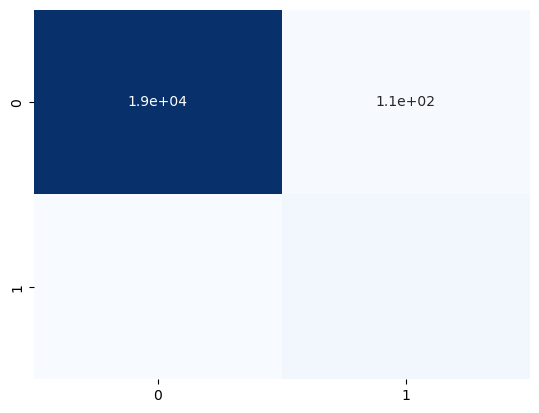

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt

confusion_metrix = metrics.confusion_matrix(y_test, y_pred)
sns.heatmap(confusion_metrix,cmap="Blues", cbar=False, annot=True)
plt.xticks
plt.yticks
plt.show()

In [49]:
# Print the classification report for the model
# YOUR CODE HERE!
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     18765
           1       0.84      0.98      0.91       619

    accuracy                           0.99     19384
   macro avg       0.92      0.99      0.95     19384
weighted avg       0.99      0.99      0.99     19384



### Step 4: Answer the following question.

**Question:** How well does the logistic regression model predict both the `0` (healthy loan) and `1` (high-risk loan) labels?

**Answer:** WRITE YOUR ANSWER HERE! The mechanical advantage of the logistic regression model is that, it is good at predicting healthy loans with accuracy, precision and recall close to 100%. Still, it performs worst when identifying high-risk loans, where its precision is 85% to 91% accuracy. This means that the model is good for healthy loans to high risk loans.


---